In [11]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import sklearn                        
import sklearn.datasets as ds           
import sklearn.model_selection as cv   
import sklearn.neighbors as nb   
import warnings
warnings.filterwarnings("ignore")
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


In [14]:

# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.719385449615906


In [7]:
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[ 207  502]
 [ 119 1385]]


In [8]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       mucho       0.63      0.29      0.40       709
        poco       0.73      0.92      0.82      1504

    accuracy                           0.72      2213
   macro avg       0.68      0.61      0.61      2213
weighted avg       0.70      0.72      0.68      2213



In [9]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')  

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.58536585 0.67886179 0.66666667 0.67615176 0.70325203 0.73405699
 0.72591588 0.68113976 0.65128901 0.63772049]


In [11]:
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.6740420219670311
0.04120532553648815


In [12]:
# Method 2
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[ 802 1666]
 [ 738 4169]]
0.6740338983050848


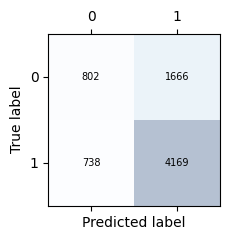

In [13]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

In [14]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       mucho       0.63      0.29      0.40       709
        poco       0.73      0.92      0.82      1504

    accuracy                           0.72      2213
   macro avg       0.68      0.61      0.61      2213
weighted avg       0.70      0.72      0.68      2213



In [19]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

Accuracy 5 neighbours: 0.7041855966893078


In [20]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbour: and distance weighting:", np.mean(cv_scores))

Accuracy 5 neighbour: and distance weighting: 0.7072844976234387


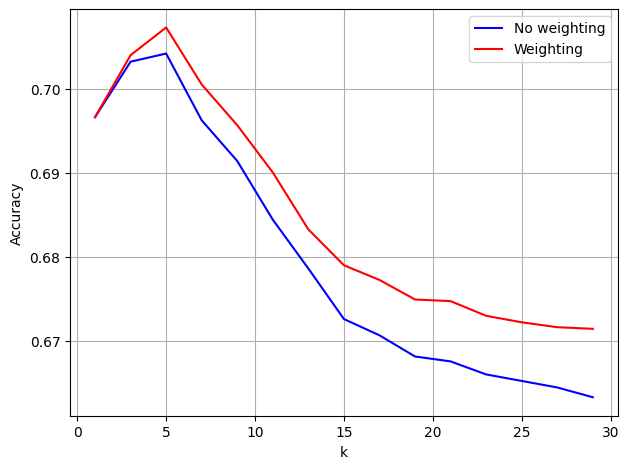

In [21]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 5, 'weights': 'distance'} Accuracy= 0.7072844976234387


In [25]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))

[[ 215  494]
 [ 123 1381]]
0.7211929507455942


In [28]:
# interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.721 +/- 0.019


(0.7025104505423331, 0.7398754509488553)

In [27]:
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.7020156829827032, 0.7395244809375142)